In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
AdvWorksTrain = pd.read_csv('AdvWorksCusts.csv')
AW_AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')

AdvWorksTrain.columns = [str.replace('-', '_') for str in AdvWorksTrain.columns]

for col in AdvWorksTrain.columns:
    if AdvWorksTrain[col].dtype == object:
        count = 0
        count = [count + 1 for x in AdvWorksTrain[col] if x == '?']
        #print(col + ' ' + str(sum(count)))    
        
AdvWorksTrain = pd.merge(AdvWorksTrain, AW_AveMonthSpend)        

print(AdvWorksTrain.shape)

(16749, 24)


In [3]:
AdvWorksTrain.drop('Title', axis = 1, inplace = True)
AdvWorksTrain.drop('Suffix', axis = 1, inplace = True)
AdvWorksTrain.drop('AddressLine2', axis = 1, inplace = True)
AdvWorksTrain.drop('MiddleName', axis = 1, inplace = True)

AdvWorksTrain.head(5)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [4]:
print(AdvWorksTrain['Occupation'].unique())
Features = AdvWorksTrain['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features.shape)

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
(16749,)


In [5]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [6]:
print(Features.shape)

(16749, 5)


In [7]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['Gender', 'MaritalStatus','Education']

for col in categorical_columns:
    temp = encode_string(AdvWorksTrain[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(16749, 14)
[[0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]]


In [8]:
Features = np.concatenate([Features, np.array(AdvWorksTrain[['HomeOwnerFlag', 'NumberCarsOwned',
                                                           'NumberChildrenAtHome','TotalChildren']])], axis = 1)
Features[:2,:]

array([[0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 2.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        3., 3.]])

In [9]:
print(Features.shape)

(16749, 18)


In [10]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(AdvWorksTrain['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 80)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [11]:
print(Features.shape)

(16749, 18)


In [12]:
scaler = preprocessing.StandardScaler().fit(x_train[:,16:])
x_train[:,16:] = scaler.transform(x_train[:,16:])
x_test[:,16:] = scaler.transform(x_test[:,16:])
print(x_train.shape)
x_train[:19,:]

(16669, 18)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         3.00000000e+00, -6.55818007e-01, -1.19390248e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00, -6.55818007e-01,  1.77517916e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e

In [13]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [14]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.56891621e+12  6.56891621e+12  6.56891621e+12  6.56891621e+12
  6.56891621e+12  1.16658066e+12  1.16658066e+12 -4.15593311e+13
 -4.15593311e+13  3.38238343e+13  3.38238343e+13  3.38238343e+13
  3.38238343e+13  3.38238343e+13 -5.58778717e-01  4.04201361e-01
  1.93579518e+01 -1.23949964e+00]


In [15]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 46.32322664173712
Root Mean Square Error = 6.806116854839999
Mean Absolute Error    = 5.183853424052047
Median Absolute Error  = 3.982932098687286
R^2                    = 0.923272887929014
Adjusted R^2           = 0.8834338105075404


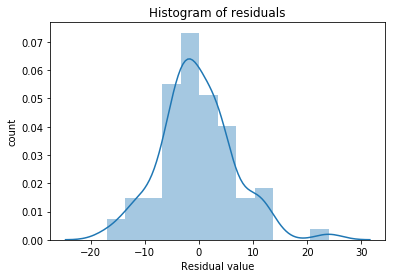

In [16]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

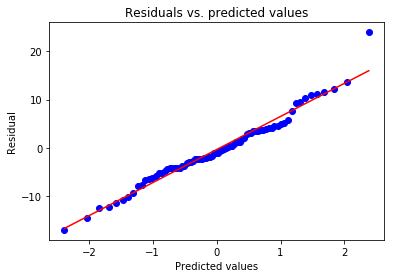

In [17]:
import scipy.stats as ss

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

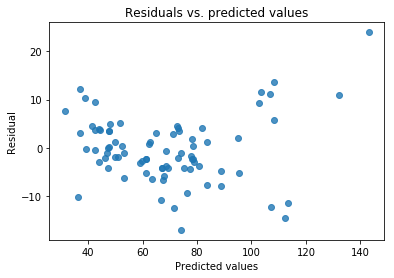

In [18]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [19]:
AdvWorksTest = pd.read_csv('AW_test.csv') 

In [20]:
AdvWorksTest.drop('Title', axis = 1, inplace = True)
AdvWorksTest.drop('Suffix', axis = 1, inplace = True)
AdvWorksTest.drop('AddressLine2', axis = 1, inplace = True)
AdvWorksTest.drop('MiddleName', axis = 1, inplace = True)

#AdvWorksTest = pd.merge(AdvWorksTest, AW_BikeBuyer)  
print(AdvWorksTest.shape)

(500, 19)


In [21]:
print(AdvWorksTest['Occupation'].unique())
FeaturesTest = AdvWorksTest['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(FeaturesTest)
FeaturesTest = enc.transform(FeaturesTest)
print(FeaturesTest)

['Management' 'Skilled Manual' 'Manual' 'Clerical' 'Professional']
[1 4 1 4 2 0 4 3 2 4 3 3 4 3 4 3 4 4 1 0 2 4 3 4 3 1 4 3 3 1 4 1 1 1 3 0 1
 4 3 4 3 2 4 0 4 4 2 4 1 0 1 3 1 2 3 4 3 4 4 0 0 0 3 3 2 4 3 1 0 3 3 1 3 0
 0 3 0 4 3 3 4 4 0 1 0 0 3 1 2 1 1 4 1 4 2 3 2 4 4 3 1 1 4 1 3 3 2 1 3 1 3
 4 3 0 4 3 0 4 4 3 4 3 3 0 4 3 0 4 2 1 4 2 4 3 3 1 3 4 3 3 3 4 1 4 3 3 4 2
 2 4 4 0 0 4 1 0 3 0 3 3 4 4 4 4 3 1 1 3 3 0 0 3 4 1 0 0 1 4 2 3 2 4 3 1 2
 3 4 2 4 0 4 1 3 1 1 4 3 3 1 1 3 4 2 4 3 3 1 3 1 0 4 2 4 4 4 3 4 3 4 0 4 4
 1 4 2 3 3 3 2 4 0 1 4 2 3 2 2 4 3 0 3 3 0 2 3 0 0 0 1 3 3 4 2 1 1 3 4 4 1
 4 0 4 1 4 0 3 4 3 1 3 3 0 1 0 3 0 3 3 2 4 3 3 4 2 2 2 4 0 1 2 0 3 4 3 0 1
 3 2 0 2 3 4 1 4 1 0 3 1 3 1 0 3 3 3 4 4 4 3 3 3 0 2 4 3 1 2 4 3 4 3 1 4 0
 4 3 1 3 4 3 4 3 4 4 3 0 2 3 2 3 1 1 0 1 4 1 1 4 3 2 3 1 3 4 3 0 2 0 3 0 4
 3 0 4 2 3 3 4 0 0 1 4 3 2 1 3 3 1 2 4 4 4 1 0 4 4 4 3 2 2 4 1 3 1 3 4 3 4
 4 4 0 3 0 1 4 0 4 3 1 1 4 1 0 3 2 1 4 0 2 2 2 0 3 3 3 0 0 3 1 4 1 4 1 3 1
 2 3 4 2 0 4 2 4 3 4 1 4 3 4 4 3 

In [22]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(FeaturesTest.reshape(-1,1))
FeaturesTest = encoded.transform(FeaturesTest.reshape(-1,1)).toarray()
FeaturesTest[:10,:]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [23]:
print(FeaturesTest.shape)

(500, 5)


In [24]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['Gender', 'MaritalStatus','Education']

for col in categorical_columns:
    temp = encode_string(AdvWorksTest[col])
    FeaturesTest = np.concatenate([FeaturesTest, temp], axis = 1)

print(FeaturesTest.shape)
print(FeaturesTest[:2, :]) 

(500, 14)
[[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.]]


In [25]:
FeaturesTest = np.concatenate([FeaturesTest, np.array(AdvWorksTest[['HomeOwnerFlag', 'NumberCarsOwned',
                                                           'NumberChildrenAtHome','TotalChildren']])], axis = 1)
FeaturesTest[:2,:]

array([[0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 2.,
        0., 5.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 2.,
        2., 4.]])

In [26]:
print(FeaturesTest.shape)

(500, 18)


In [27]:
lin_mod.predict(FeaturesTest) 

array([ 52.51343931, 124.28134257,  61.8662202 ,  87.54981395,
        82.85409185,  52.71362536, 118.41024882, 168.04509776,
       145.18083995,  77.09403811,  71.98832754,  60.34400109,
        85.41553197,  56.42804695,  53.14208984,  66.00390625,
        87.54981395,  80.35693822, 149.19870618,  84.71664068,
        78.98339844,  88.47925036, 184.75339368,  92.5078125 ,
        60.36500181,  87.14258739, 108.24345217, 142.45472407,
        89.4453125 ,  65.99096911,  89.3345606 ,  89.4609375 ,
        61.54815951,  83.10718931, 137.34490245, 133.17664558,
       186.22116712, 110.62626467,  64.578125  , 108.24345217,
        58.3046875 , 108.11068596,  90.5703125 ,  56.296875  ,
        77.09403811,  90.7265625 ,  83.4126856 , 108.41785652,
       131.81991216,  82.48731395,  94.25415734, 137.0519337 ,
        99.83706349,  76.25049291,  59.46582494,  88.88550036,
        80.53520254,  85.25493592,  83.49512645,  79.78432831,
        52.26440661,  80.4816964 , 111.68364004, 111.86